In [1]:
# Book: Magnus Ekman - Learning Deep Learning 
### Chapter 6: FCNs Applied to Regression with Boston Housing Dataset

# Fully Connected Networks applied to Regression Problem

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import logging

2022-09-17 20:27:50.160858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-17 20:27:50.288364: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-17 20:27:50.904094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-17 20:27:50.904181: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [3]:
from keras.datasets import boston_housing
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 500
BATCH_SIZE = 16

# Read the data

# The data is not normalized for now
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()



In [4]:
import pandas as pd

In [5]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


As can be seen the features is not normalized, so we need to do it before attempting any training

In [6]:
x_mean = np.mean(X_train, axis = 0)
x_std = np.std(X_train, axis = 0)

In [7]:
x_mean.shape, x_std.shape

((13,), (13,))

In [8]:
x_train = (X_train - x_mean) / x_std
x_test = (X_test - x_mean) / x_std

In [9]:
from keras.regularizers import l2
from keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation = "relu", input_shape=[13]))
model.add(Dropout(.3))
model.add(Dense(128, activation = "relu")) # We are doing DL
model.add(Dropout(.3))
model.add(Dense(64, activation = "relu")) # We are doing DL
model.add(Dropout(.3))
model.add(Dense(1, activation = 'linear'))

model.compile(loss='mean_squared_error', optimizer = "adam", metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

2022-09-17 20:27:51.900713: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-17 20:27:51.937221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-09-17 20:27:51.937237: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-17 20:27:51.937651: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [10]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = EPOCHS, batch_size=BATCH_SIZE, verbose = 2, shuffle = True)

Epoch 1/500
26/26 - 1s - loss: 527.1599 - mean_absolute_error: 21.0057 - val_loss: 426.8065 - val_mean_absolute_error: 18.5182 - 505ms/epoch - 19ms/step
Epoch 2/500
26/26 - 0s - loss: 212.3658 - mean_absolute_error: 11.6379 - val_loss: 79.4715 - val_mean_absolute_error: 7.0423 - 53ms/epoch - 2ms/step
Epoch 3/500
26/26 - 0s - loss: 74.4636 - mean_absolute_error: 6.4005 - val_loss: 43.6633 - val_mean_absolute_error: 5.0741 - 51ms/epoch - 2ms/step
Epoch 4/500
26/26 - 0s - loss: 52.8619 - mean_absolute_error: 5.5023 - val_loss: 31.0200 - val_mean_absolute_error: 4.2255 - 51ms/epoch - 2ms/step
Epoch 5/500
26/26 - 0s - loss: 43.9468 - mean_absolute_error: 4.7816 - val_loss: 27.8163 - val_mean_absolute_error: 4.0229 - 51ms/epoch - 2ms/step
Epoch 6/500
26/26 - 0s - loss: 40.0732 - mean_absolute_error: 4.8816 - val_loss: 27.2289 - val_mean_absolute_error: 3.8684 - 51ms/epoch - 2ms/step
Epoch 7/500
26/26 - 0s - loss: 44.5846 - mean_absolute_error: 5.0000 - val_loss: 28.9560 - val_mean_absolute_e

In [11]:
preds = model.predict(x_test)

for i in range(4):
    print(f"Prediction: {preds[i].item()}, True Val: {y_test[i]} ")

4/4 [==============================] - 0s 1ms/step
Prediction: 9.557350158691406, True Val: 7.2 
Prediction: 18.757902145385742, True Val: 18.8 
Prediction: 20.498165130615234, True Val: 19.0 
Prediction: 30.956092834472656, True Val: 27.0 


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


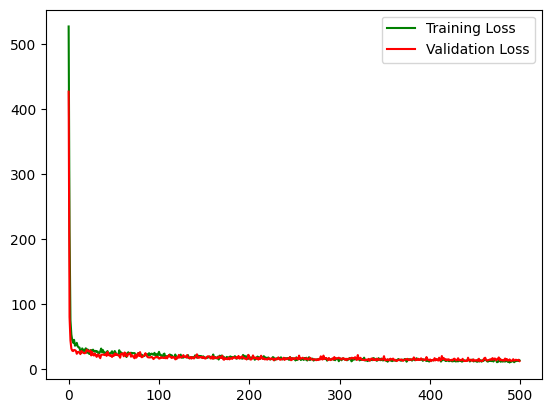

In [12]:
import matplotlib.pyplot as plt

print(dict.keys(history.history))

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(range(EPOCHS), loss, 'g', label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, 'r', label = 'Validation Loss')
plt.legend()
plt.show()
# loss = history.history["mae"]
# val_loss = history.history["val_mae"]
# epochs = range(1, len(loss)+1)
# plt.figure()
# plt.plot(epochs, loss, "bo", label="Training MAE")
# plt.plot(epochs, val_loss, "b", label="Validation MAE")
# plt.title("Train and Val MAE")
# plt.legend()
# plt.show()

<Figure size 640x480 with 0 Axes>

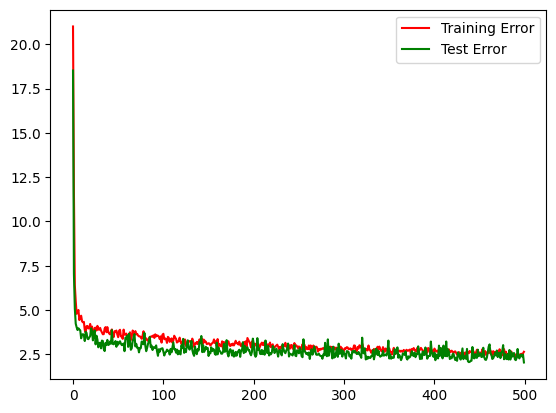

In [13]:
plt.figure()
loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

plt.figure()
plt.plot(range(EPOCHS), loss, 'r', label = 'Training Error')
plt.plot(range(EPOCHS), val_loss, 'g', label = 'Test Error')
plt.legend()
plt.show()

Techniques that are intended to improve generalization error are collectively known as regularization techniques. One regularization technique is early stopping, but that is only helpful if the test error shows a U-shaped curve.

One common regularization technique is weight decay. Weight decay is implemented by adding a penalty term to the loss functionn.

Loss = cross entropy + $ \lambda\displaystyle\sum_{i=0}^{n} |w_j| $

Weight decay is common regularization technique. Two examples are L1 and L2 regularization. It is not only applicable to DL but also ML.